In [1]:
# import libraries of data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading dataset 
dataset from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 


In [2]:
# path to the dataset
path = '../data/house-prices-advanced-regression-techniques/train.csv'
df = pd.read_csv(path)

# view first 10 rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Target variable
The last column 'SalePrice' is the target variable
Rest of the columns are either features or bloated data.
target variable wil be seperated after cleaning of data.

## Checking missing values
## Only Columns with missing will be displayed 
**drop** columns which have more than 200 null values

In [3]:
# Total nan values
print("Total number of null values")
print(df.isnull().sum().sum())
# get all the columns with nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]

drop_list = [] # this contains all the columns to be droped later

for i in nan_cols:
    print(i, df[i].isnull().sum())
    if df[i].isnull().sum() > 200:
        drop_list.append(i)

df.drop(columns=drop_list, inplace=True)

Total number of null values
7829
LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


# Numerical and categroical analysis

In [4]:
# Sperate dataset into numerical and categorical dataset.
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(exclude=[np.number])

# basic statistics of numerical data
num_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
frequency = {}

for i in cat_df.columns:
    for j in list([cat_df[i].unique(), cat_df[i].value_counts()]):
        print(f"*****************{i}*****************")
        print(j[:5], end="\n\n\n")

*****************MSZoning*****************
['RL' 'RM' 'C (all)' 'FV' 'RH']


*****************MSZoning*****************
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


*****************Street*****************
['Pave' 'Grvl']


*****************Street*****************
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


*****************LotShape*****************
['Reg' 'IR1' 'IR2' 'IR3']


*****************LotShape*****************
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


*****************LandContour*****************
['Lvl' 'Bnk' 'Low' 'HLS']


*****************LandContour*****************
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


*****************Utilities*****************
['AllPub' 'NoSeWa']


*****************Utilities*****************
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


*****************LotC

# removing duplicates
No duplicates can be removed as duplicate rows are not identifiers but categories.

# Split dataset

- Combine numerical and categorical dataset
- Drop all null values
- Identify the target variable
- Split the train and test data

In [6]:
# check if both numerical and categorical dataframes are of same dimensions
print(num_df.shape)
print(cat_df.shape)

df = pd.concat([num_df, cat_df], axis=1)

(1460, 37)
(1460, 37)


In [7]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [8]:
df.dropna()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [9]:
target = df['SalePrice']
df.drop(columns=['SalePrice'], inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=2)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 73)
(292, 73)
(1168,)
(292,)


# plotting
Study data visually

TODO:
- subplot for getting sales price in each category
- subplot for line for numerical data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def histogram(data, name):
    plt.hist(data, bins=30)
    plt.xlabel(name)
    plt.ylabel('Sale Price')
    plt.title(f'{name} Vs Sale Price')
    plt.show()

In [14]:
def correlation(data):
    num_df = data.select_dtypes(include=np.number)
    plt.matshow(num_df.corr())
    plt.show()

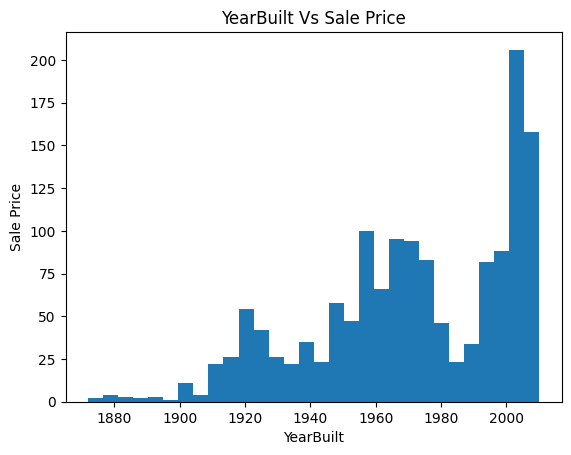

In [15]:
histogram(df.YearBuilt, "YearBuilt")

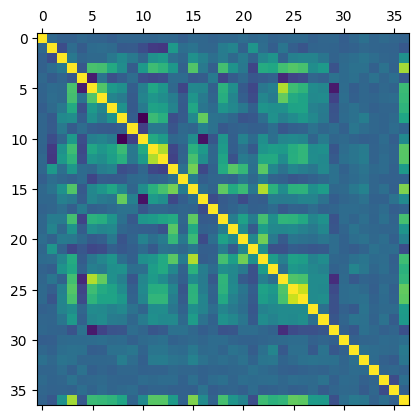

In [16]:
correlation(num_df)